In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [122]:
def condition_number(d, n, rng):
    '''d is the number of free parameters, n is the number of equations'''
    A = rng.standard_normal((d, n))
    singular_values = np.linalg.svd(A, compute_uv=False, hermitian=False)
    return singular_values[0]/singular_values[-1]

def condition_number_kernel(d, n, sigma, rng):
    '''d is the number of free parameters, n is the number of equations'''
    aux = rng.standard_normal((d, n))
    
    aux = np.repeat(aux[np.newaxis, :, :], aux.shape[0], axis=0)
    A = np.exp(-np.sum((aux - np.transpose(aux, [1, 0, 2]))**2, axis=0)/(2*sigma**2))
    
    singular_values = np.linalg.svd(A, compute_uv=False, hermitian=False)
    return singular_values[0]/singular_values[-1]

In [3]:
rng = np.random.default_rng()

In [15]:
save_folder = 'fig'

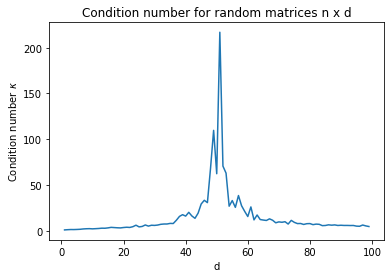

In [113]:
n = 50
span = range(1, 2*n)
c_number = []
for d in span:
    c_number.append(condition_number(d, n, rng))
    
plt.plot(span, c_number)
plt.xlabel('d')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random matrices n x d')
plt.savefig(f'{save_folder}/condition_number_vs_d.pdf')

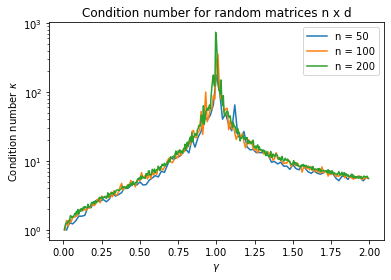

In [114]:
n_s = [50, 100, 200]

for n in n_s:
    span = np.array(range(1, 2*n))
    c_number = []
    for d in span:
        c_number.append(condition_number(d, n, rng))
    
    plt.plot(span/n, c_number, label=f'n = {n}')
plt.legend()
plt.xlabel(r'$\gamma$')
plt.yscale('log')
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random matrices n x d')
plt.savefig(f'{save_folder}/condition_number_vs_gamma.pdf')

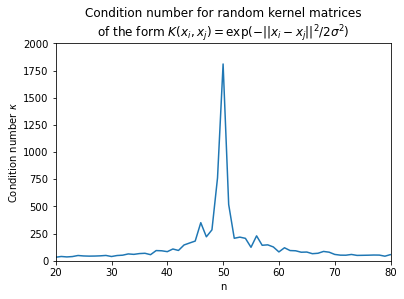

In [132]:
n = 50
span = range(1, 2*n)
c_number = []
for d in span:
    c_number.append(condition_number_kernel(d, n, 5, rng))
    
plt.plot(span, c_number)
plt.xlabel('n')
plt.xlim(20, 80)
plt.ylim(0, 2000)
plt.ylabel(r'Condition number $\kappa$')
plt.title('Condition number for random kernel matrices\nof the form ' + r'$K(x_i, x_j) = \exp(-||x_i - x_j||^2/2\sigma^2)$')
plt.savefig(f'{save_folder}/condition_number_random_matrices.pdf')